In [1]:
# all necessary imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df_train=pd.read_csv('train.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_train.tail(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8663,9244_01,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock,True
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8665,9247_01,Earth,True,G/1491/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,NaN,Phia Cleang,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8668,9251_01,Mars,True,F/1793/S,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,Melios Kashe,True
8669,9252_01,Europa,False,B/301/P,55 Cancri e,26.0,False,0.0,8160.0,205.0,0.0,438.0,Alchium Stranbeate,True
8670,9252_02,Europa,True,B/301/P,55 Cancri e,19.0,False,0.0,0.0,0.0,0.0,0.0,Muonon Stranbeate,True
8671,9253_01,Earth,True,G/1493/S,PSO J318.5-22,16.0,False,0.0,0.0,0.0,0.0,0.0,Jimmyn Thomason,True
8672,9254_01,Earth,True,G/1502/P,PSO J318.5-22,61.0,False,0.0,0.0,0.0,0.0,0.0,Kenny Mallerez,False


In [8]:
df_train_copy=df_train.copy()

In [9]:
df_train_drop=df_train.dropna()

In [10]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [13]:
df_fill=df_train.interpolate()

In [16]:
df_fill_drop=df_fill.dropna()

In [17]:
df_fill_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 834.1+ KB


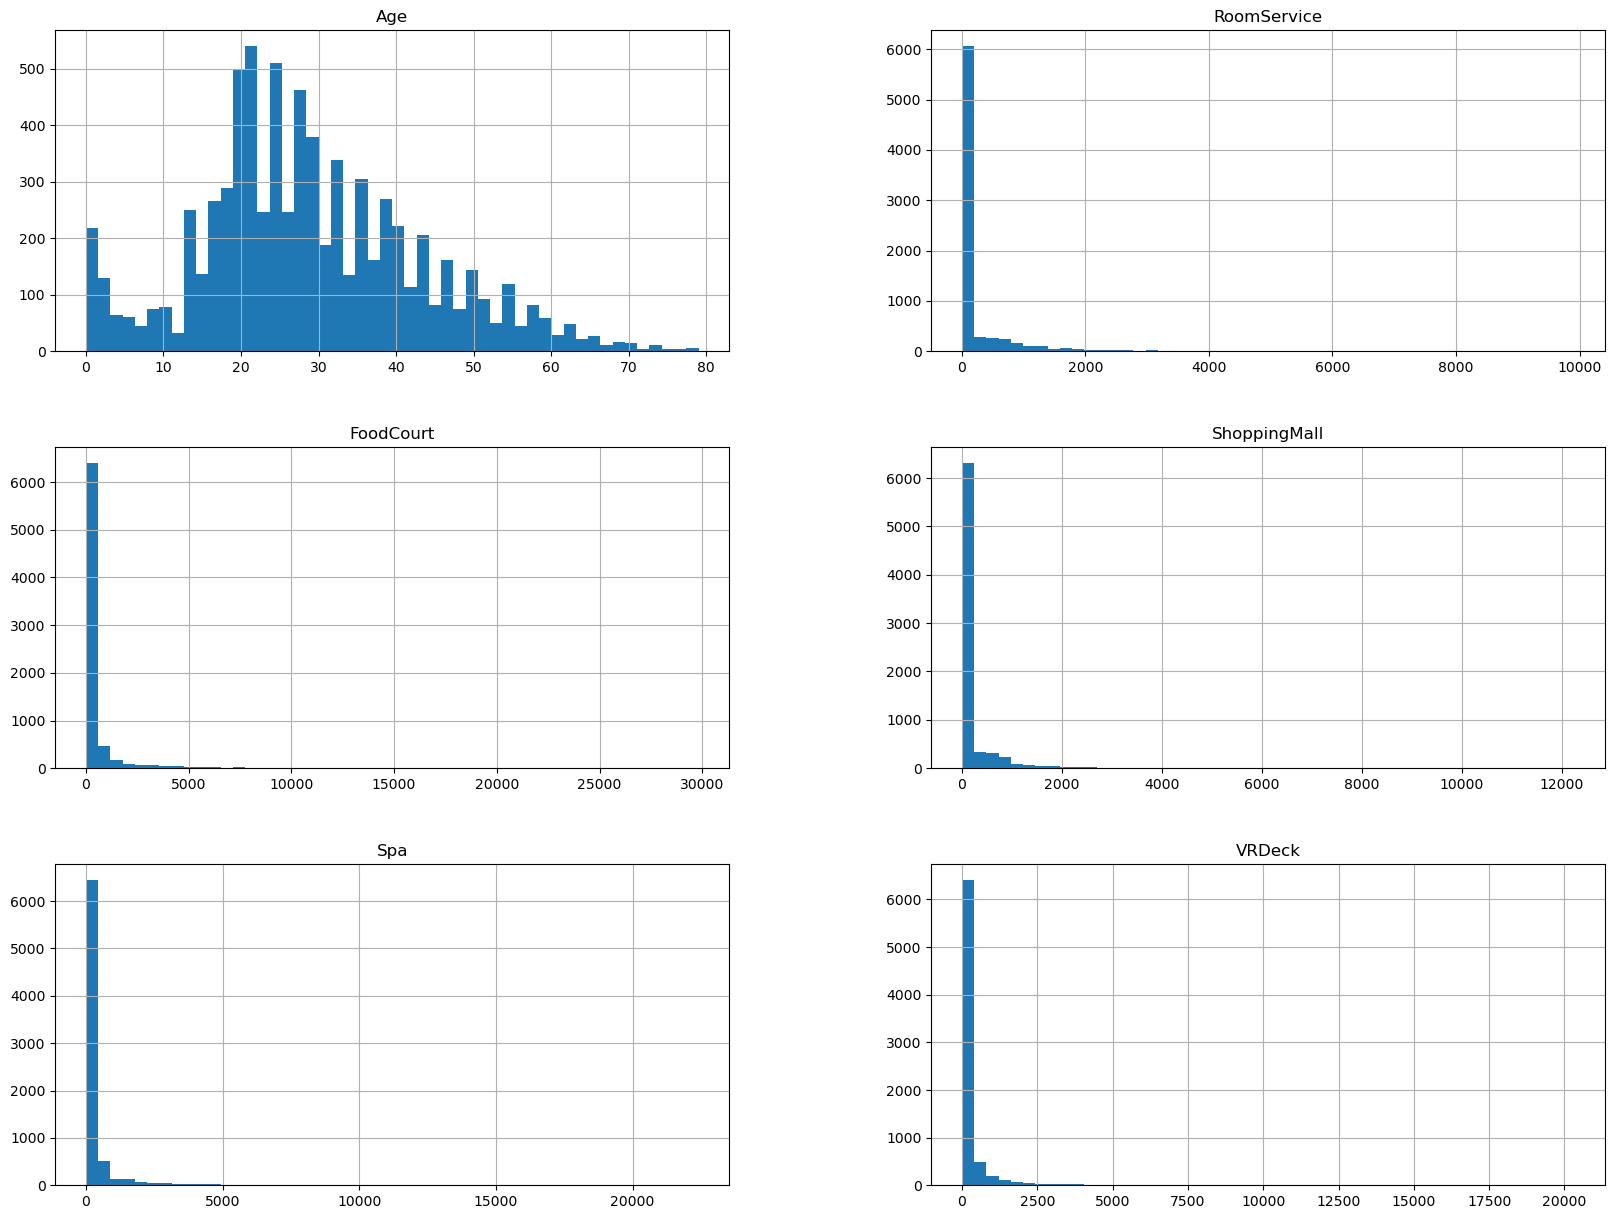

In [18]:
%matplotlib inline

df_fill_drop.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
import sklearn
assert sklearn.__version__ >="0.20"

In [22]:
df_fill_drop['Transported'] = df_fill_drop['Transported'].astype(int)

C:\Users\bizor\AppData\Local\Temp\ipykernel_215320\3512823842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill_drop['Transported'] = df_fill_drop['Transported'].astype(int)


In [24]:
df_fill_drop

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [25]:
corr_matrix=df_fill_drop.corr()

In [26]:
corr_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.072560,0.129384,0.041190,0.117756,0.097958,-0.077385
RoomService,0.072560,1.000000,-0.014342,0.057959,0.011209,-0.027202,-0.245247
FoodCourt,0.129384,-0.014342,1.000000,-0.011072,0.210550,0.225322,0.050817
ShoppingMall,0.041190,0.057959,-0.011072,1.000000,0.022841,-0.003219,0.011427
Spa,0.117756,0.011209,0.210550,0.022841,1.000000,0.157906,-0.215003
VRDeck,0.097958,-0.027202,0.225322,-0.003219,0.157906,1.000000,-0.208954
Transported,-0.077385,-0.245247,0.050817,0.011427,-0.215003,-0.208954,1.000000


In [27]:
corr_matrix["Transported"].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.050817
ShoppingMall    0.011427
Age            -0.077385
VRDeck         -0.208954
Spa            -0.215003
RoomService    -0.245247
Name: Transported, dtype: float64

In [31]:
df_fill_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7559 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7559 non-null   object 
 1   HomePlanet    7559 non-null   object 
 2   CryoSleep     7559 non-null   object 
 3   Cabin         7559 non-null   object 
 4   Destination   7559 non-null   object 
 5   Age           7559 non-null   float64
 6   VIP           7559 non-null   object 
 7   RoomService   7559 non-null   float64
 8   FoodCourt     7559 non-null   float64
 9   ShoppingMall  7559 non-null   float64
 10  Spa           7559 non-null   float64
 11  VRDeck        7559 non-null   float64
 12  Name          7559 non-null   object 
 13  Transported   7559 non-null   int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 856.3+ KB


array([[<AxesSubplot:xlabel='Transported', ylabel='Transported'>,
        <AxesSubplot:xlabel='Age', ylabel='Transported'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='Transported'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='Transported'>,
        <AxesSubplot:xlabel='Spa', ylabel='Transported'>,
        <AxesSubplot:xlabel='VRDeck', ylabel='Transported'>,
        <AxesSubplot:xlabel='RoomService', ylabel='Transported'>],
       [<AxesSubplot:xlabel='Transported', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='Age'>,
        <AxesSubplot:xlabel='ShoppingMall', ylabel='Age'>,
        <AxesSubplot:xlabel='Spa', ylabel='Age'>,
        <AxesSubplot:xlabel='VRDeck', ylabel='Age'>,
        <AxesSubplot:xlabel='RoomService', ylabel='Age'>],
       [<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='Age', ylabel='FoodCourt'>,
        <AxesSubplot:xlabel='FoodCourt', ylabel='FoodC

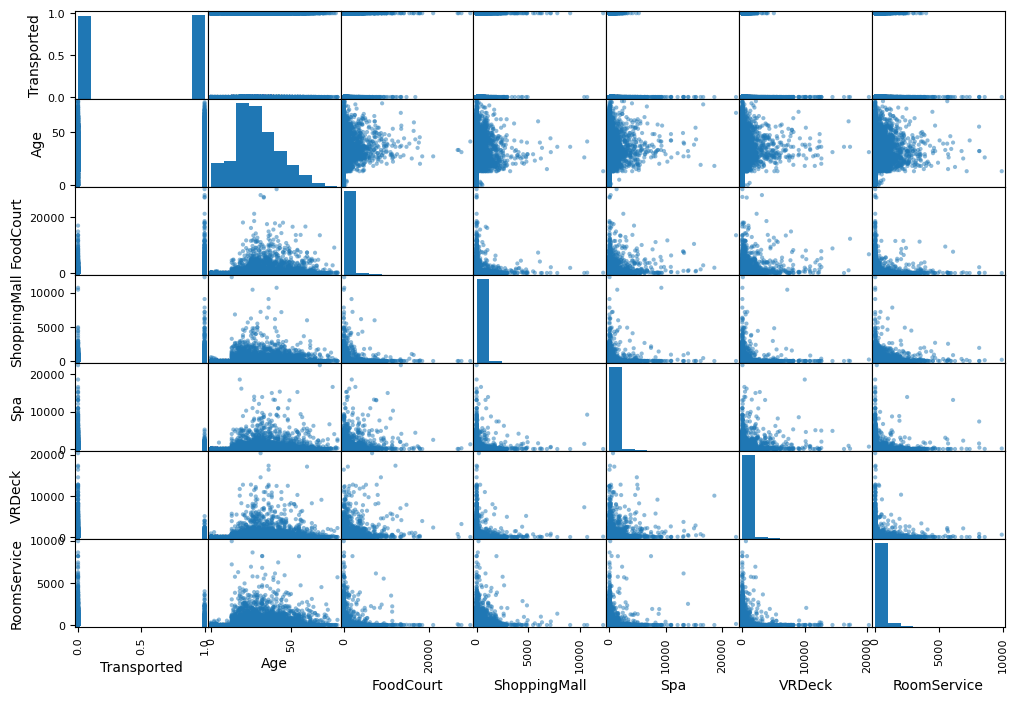

In [32]:
from pandas.plotting import scatter_matrix

attributes=["Transported","Age","FoodCourt","ShoppingMall","Spa","VRDeck","RoomService"]

scatter_matrix(df_fill_drop[attributes],figsize=(12,8))


In [95]:
df_fill_drop_train=df_fill_drop.drop(["Transported","Name","PassengerId","Cabin"],axis=1)
transported_labels=df_fill_drop["Transported"].copy()

In [96]:
transported_labels

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 7559, dtype: int32

In [97]:
df_fill_drop_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [94]:
df_fill_drop['VIP'] = df_fill_drop['VIP'].astype(int)

C:\Users\bizor\AppData\Local\Temp\ipykernel_215320\2111945228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill_drop['VIP'] = df_fill_drop['VIP'].astype(int)


In [98]:
df_fill_train_cat=df_fill_drop_train[["HomePlanet","Cabin","Destination"]]

KeyError: "['Cabin'] not in index"

In [52]:
df_fill_train_cat["Cabin"].unique()


array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [58]:
columns = ["HomePlanet","Destination"]

unique_counts = df_fill_train_cat[columns].nunique()

# Print the number of unique values for each column
print(unique_counts)

HomePlanet     3
Destination    3
dtype: int64


In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your dataset

# Specify the columns you want to encode
categorical_columns = ["HomePlanet","Destination"]

# Create the OrdinalEncoder instance
encoder = OneHotEncoder()

# Fit and transform the categorical columns
df_fill_train_cat_encoded = encoder.fit_transform(df_fill_train_cat[categorical_columns])

# Now your data has the categorical columns encoded with ordinal values


In [82]:
df_fill_train_cat_encoded

<7559x6 sparse matrix of type '<class 'numpy.float64'>'
	with 15118 stored elements in Compressed Sparse Row format>

In [99]:
df_fill_train_cat

,HomePlanet,Destination
0,Europa,TRAPPIST-1e
1,Earth,TRAPPIST-1e
2,Europa,TRAPPIST-1e
3,Europa,TRAPPIST-1e
4,Earth,TRAPPIST-1e
...,...,...
8688,Europa,55 Cancri e
8689,Earth,PSO J318.5-22
8690,Earth,TRAPPIST-1e
8691,Europa,55 Cancri e


In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder.categories_

[array(['Earth', 'Europa', 'Mars'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)]

In [84]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_fill_train_cat_encoded_1hot = cat_encoder.fit_transform(df_fill_train_cat)
df_fill_train_cat_encoded_1hot

<7559x6 sparse matrix of type '<class 'numpy.float64'>'
	with 15118 stored elements in Compressed Sparse Row format>

In [85]:
df_fill_train_cat_encoded_1hot.toarray()

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.]])

In [100]:
print(df_fill_train_cat_encoded_1hot)

  (0, 1)	1.0
  (0, 5)	1.0
  (1, 0)	1.0
  (1, 5)	1.0
  (2, 1)	1.0
  (2, 5)	1.0
  (3, 1)	1.0
  (3, 5)	1.0
  (4, 0)	1.0
  (4, 5)	1.0
  (5, 0)	1.0
  (5, 4)	1.0
  (6, 0)	1.0
  (6, 5)	1.0
  (7, 0)	1.0
  (7, 5)	1.0
  (8, 0)	1.0
  (8, 5)	1.0
  (9, 1)	1.0
  (9, 3)	1.0
  (10, 1)	1.0
  (10, 5)	1.0
  (11, 1)	1.0
  (11, 3)	1.0
  (12, 2)	1.0
  :	:
  (7546, 5)	1.0
  (7547, 1)	1.0
  (7547, 5)	1.0
  (7548, 0)	1.0
  (7548, 5)	1.0
  (7549, 0)	1.0
  (7549, 3)	1.0
  (7550, 0)	1.0
  (7550, 5)	1.0
  (7551, 0)	1.0
  (7551, 5)	1.0
  (7552, 1)	1.0
  (7552, 5)	1.0
  (7553, 1)	1.0
  (7553, 5)	1.0
  (7554, 1)	1.0
  (7554, 3)	1.0
  (7555, 0)	1.0
  (7555, 4)	1.0
  (7556, 0)	1.0
  (7556, 5)	1.0
  (7557, 1)	1.0
  (7557, 3)	1.0
  (7558, 1)	1.0
  (7558, 5)	1.0


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline=Pipeline([
    # ('imputer',SimpleImputer(strategy="median")),
    # ('attribs-adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [101]:
df_fill_drop_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [102]:
df_fill_drop_num=df_fill_drop_train.drop(["HomePlanet","Destination"],axis=1)

In [236]:
df_fill_drop_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [104]:
df_fill_drop_num_tr = num_pipeline.fit_transform(df_fill_drop_num)

In [105]:
df_fill_drop_num_tr

array([[-0.74650677,  0.70456665, -0.15618434, ..., -0.3118195 ,
        -0.27543072, -0.27095489],
       [-0.74650677, -0.33623324, -0.15618434, ..., -0.26737201,
         0.21147857, -0.23178064],
       [-0.74650677,  2.02291319,  6.40269041, ..., -0.3118195 ,
         5.68011735, -0.22732903],
       ...,
       [-0.74650677, -0.19745992, -0.15618434, ...,  3.01640854,
        -0.27454382, -0.27095489],
       [-0.74650677,  0.21886003, -0.15618434, ..., -0.3118195 ,
         0.03764575,  2.60924255],
       [-0.74650677,  1.05149995, -0.15618434, ..., -0.3118195 ,
        -0.27543072, -0.26027101]])

In [110]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_fill_drop_num)
cat_attribs = ["HomePlanet","Destination"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(df_fill_drop_train)

In [112]:
df_train_prepared=housing_prepared.copy()

df_train_prepared


array([[-0.74650677,  0.70456665, -0.15618434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.74650677, -0.33623324, -0.15618434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.74650677,  2.02291319,  6.40269041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.74650677, -0.19745992, -0.15618434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.74650677,  0.21886003, -0.15618434, ...,  1.        ,
         0.        ,  0.        ],
       [-0.74650677,  1.05149995, -0.15618434, ...,  0.        ,
         0.        ,  1.        ]])

In [114]:
df_train_prepared.shape

(7559, 14)

In [115]:
transported_labels

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 7559, dtype: int32

In [116]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(df_train_prepared,transported_labels)

LogisticRegression()

In [122]:
some_data=df_fill_drop_train.iloc[:5]

some_labels=transported_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)


In [123]:
print("Predictions:", log_reg.predict(some_data_prepared))

Predictions: [1 0 0 0 0]


In [125]:
some_labels

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [126]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_prepared,transported_labels)

DecisionTreeRegressor()

In [127]:
some_data=df_fill_drop_train.iloc[:5]

some_labels=transported_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)

In [128]:
print("Predictions:", log_reg.predict(some_data_prepared))

Predictions: [1 0 0 0 0]


In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [132]:
y_pred=[1, 0, 0, 0 ,0]
y_test=some_labels

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4


In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scores = cross_val_score(log_reg, df_train_prepared,transported_labels,
                         scoring="accuracy", cv=10)
print("Accuracy scores:", scores)
print("Mean accuracy:", np.mean(scores))

Accuracy scores: [0.78439153 0.77248677 0.77645503 0.7989418  0.78174603 0.77777778
 0.77910053 0.79497354 0.8042328  0.77086093]
Mean accuracy: 0.7840966747258138


In [135]:
#Random Forest classifier

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [137]:
forest_class=RandomForestClassifier()

In [138]:
forest_class.fit(df_train_prepared,transported_labels)

RandomForestClassifier()

In [139]:
some_data=df_fill_drop_train.iloc[:5]

some_labels=transported_labels.iloc[:5]

some_data_prepared=full_pipeline.transform(some_data)

In [140]:
print("Predictions:", forest_class.predict(some_data_prepared))

Predictions: [0 1 0 0 1]


In [142]:
scores = cross_val_score(forest_class, df_train_prepared,transported_labels,
                         scoring="accuracy", cv=10)
print("Accuracy scores:", scores)
print("Mean accuracy:", np.mean(scores))

Accuracy scores: [0.79761905 0.76984127 0.77777778 0.78042328 0.77645503 0.79100529
 0.78835979 0.7989418  0.78703704 0.79072848]
Mean accuracy: 0.785818879428151


In [143]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [144]:
rf_classifier = RandomForestClassifier(random_state=42)

In [146]:
param_grid={
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [148]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [149]:
grid_search.fit(df_train_prepared,transported_labels)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [150]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [151]:
cvres=grid_search.cv_results_

In [152]:
cvres

{'mean_fit_time': array([0.0978013 , 0.4704165 , 1.0201602 , 1.94070964, 0.09199557,
        0.48229885, 0.96400924, 1.93042903, 0.09296074, 0.44140964,
        0.89347148, 1.78111134, 0.08713913, 0.42468524, 0.84207606,
        1.70134978, 0.08417182, 0.42040911, 0.83777084, 1.69833174,
        0.07932558, 0.40422497, 0.8159852 , 1.64288001, 0.08197837,
        0.37321444, 0.78330679, 1.55362048, 0.08148999, 0.38054771,
        0.776264  , 1.52873683, 0.07830567, 0.38453135, 0.74849181,
        1.52405705, 0.07159538, 0.36474018, 0.71172118, 1.42574139,
        0.06836329, 0.36105628, 0.72938113, 1.42892809, 0.07212439,
        0.3678175 , 0.71439629, 1.42932739, 0.07120528, 0.3459167 ,
        0.7162508 , 1.42475653, 0.07798319, 0.35850444, 0.71937771,
        1.44227834, 0.08011165, 0.36579909, 0.70909076, 1.40629606,
        0.08300605, 0.33619308, 0.69443822, 1.40851269, 0.07613201,
        0.33872466, 0.75663538, 1.43156524, 0.07316818, 0.34654927,
        0.69982104, 1.38450832,

In [154]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.7724583215152374 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.7848937596952157 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.7851587476670204 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.785422334975611 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.778542714975541 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
0.787407074749894 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.783966958354781 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.7870098991872652 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [155]:
final_model=grid_search.best_estimator_

In [156]:
final_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                       random_state=42)

In [204]:
test_data=pd.read_csv("test.csv")

In [205]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [206]:
test_data_copy=test_data.copy()

In [207]:
test_data_drop=test_data_copy

In [208]:
test_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [209]:
most_frequent_category = test_data_drop['HomePlanet'].mode()[0]
test_data_drop['HomePlanet'].fillna(most_frequent_category, inplace=True)

In [210]:
test_data_drop["Destination"].loc[0:23]

0     TRAPPIST-1e
1     TRAPPIST-1e
2     55 Cancri e
3     TRAPPIST-1e
4     TRAPPIST-1e
5     TRAPPIST-1e
6     55 Cancri e
7     TRAPPIST-1e
8     55 Cancri e
9     55 Cancri e
10    TRAPPIST-1e
11    TRAPPIST-1e
12    TRAPPIST-1e
13    TRAPPIST-1e
14    TRAPPIST-1e
15    TRAPPIST-1e
16    TRAPPIST-1e
17    TRAPPIST-1e
18    TRAPPIST-1e
19    TRAPPIST-1e
20    TRAPPIST-1e
21    TRAPPIST-1e
22    55 Cancri e
23    55 Cancri e
Name: Destination, dtype: object

In [211]:
most_frequent_category = test_data_drop['Destination'].mode()[0]
test_data_drop['Destination'].fillna(most_frequent_category, inplace=True)

In [212]:
most_frequent_category = test_data_drop['CryoSleep'].mode()[0]
test_data_drop['CryoSleep'].fillna(most_frequent_category, inplace=True)

In [213]:
most_frequent_category = test_data_drop['VIP'].mode()[0]
test_data_drop['VIP'].fillna(most_frequent_category, inplace=True)

In [214]:
test_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [215]:
test_data_drop

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [216]:
columns_to_fill = ['RoomService', 'FoodCourt','ShoppingMall','Spa',"VRDeck"]

In [217]:
for column_name in columns_to_fill:
    most_frequent_value = test_data_drop[column_name].mode()[0]
    test_data_drop[column_name].fillna(most_frequent_value, inplace=True)

In [218]:
test_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [219]:
test_data_drop['Age'].interpolate(inplace=True)

In [220]:
test_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4177 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: bool(2), float64(6), object(5)
memory usage: 376.0+ KB


In [221]:
test_data_drop.drop(["PassengerId","Name","Cabin"],axis=1,inplace=True)

In [222]:
test_data_drop["Age"]=test_data_drop["Age"].round()

In [223]:
test_data_drop["VIP"].unique()

array([False,  True])

In [225]:
test_data_drop['VIP'] = test_data_drop['VIP'].astype(int)

In [230]:
for i in test_data_drop["VIP"]:
    if i ==1 :
        print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [231]:
test_data_drop['CryoSleep'] = test_data_drop['CryoSleep'].astype(int)

In [233]:
test_data_drop_num=test_data_drop.drop(["HomePlanet","Destination"],axis=1)

In [235]:
test_data_drop_cat=test_data_drop[["HomePlanet","Destination"]]

In [239]:
test_data_drop

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,Earth,0,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,Mars,1,55 Cancri e,42.0,0,0.0,0.0,0.0,0.0,0.0
4275,Europa,0,TRAPPIST-1e,43.0,0,0.0,2680.0,0.0,0.0,523.0


In [238]:
from sklearn.compose import ColumnTransformer

num_attribs = list(test_data_drop_num)
cat_attribs = ["HomePlanet","Destination"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
test_data_prepared = full_pipeline.transform(test_data_drop)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [240]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
test_data_drop_cat_encoded_1hot = cat_encoder.fit_transform(test_data_drop_cat)
test_data_drop_cat_encoded_1hot

<4277x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8554 stored elements in Compressed Sparse Row format>

In [243]:
test_data_drop_cat_encoded_1hot.toarray()

array([[1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

In [244]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline=Pipeline([
    # ('imputer',SimpleImputer(strategy="median")),
    # ('attribs-adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [245]:
test_data_drop_num_tr = num_pipeline.fit_transform(test_data_drop_num)

In [246]:
test_data_drop_num_tr

array([[ 1.33044268, -0.11638307, -0.13268938, ..., -0.31217285,
        -0.26784148, -0.24671194],
       [-0.75162953, -0.68291647, -0.13268938, ..., -0.31217285,
         2.28750433, -0.24671194],
       [ 1.33044268,  0.16688362, -0.13268938, ..., -0.31217285,
        -0.26784148, -0.24671194],
       ...,
       [ 1.33044268,  0.94586704, -0.13268938, ..., -0.31217285,
        -0.26784148, -0.24671194],
       [-0.75162953,  1.01668371, -0.13268938, ..., -0.31217285,
        -0.26784148,  0.17647949],
       [ 1.33044268,  1.01668371, -0.13268938, ..., -0.31217285,
        -0.26784148, -0.24671194]])

In [247]:
test_data_drop_prepared=np.c_[test_data_drop_num_tr,test_data_drop_cat_encoded_1hot.toarray()]

In [248]:
test_data_drop_prepared

array([[ 1.33044268, -0.11638307, -0.13268938, ...,  0.        ,
         0.        ,  1.        ],
       [-0.75162953, -0.68291647, -0.13268938, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.33044268,  0.16688362, -0.13268938, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.33044268,  0.94586704, -0.13268938, ...,  1.        ,
         0.        ,  0.        ],
       [-0.75162953,  1.01668371, -0.13268938, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.33044268,  1.01668371, -0.13268938, ...,  0.        ,
         1.        ,  0.        ]])

In [249]:
final_predictions=final_model.predict(test_data_drop_prepared)

In [257]:
final_predictions

array([1, 0, 1, ..., 1, 1, 0])

In [254]:
Ids = test_data['PassengerId']

In [255]:
Ids.shape

(4277,)

In [258]:
final_response

array([['0013_01', 1],
       ['0018_01', 0],
       ['0019_01', 1],
       ...,
       ['9271_01', 1],
       ['9273_01', 1],
       ['9277_01', 0]], dtype=object)

In [259]:
submission=pd.DataFrame(final_response,columns=["PassengerId","Transported"])

In [261]:
submission["Transported"]=submission["Transported"].astype(bool)

In [264]:
submission.to_csv("submission.csv",index=False)